In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pylab as plt
import gsw
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER 
import os
import numpy.ma as ma

In [89]:

# Paramètres de la simulation
pathname='/home/brout/Documents/UBO/M2/GOC/'  # Path where all the different files are located. To extract
                                                                            # ncfiles, change their name with the pattern 'property.nc'


Re=6.4E6
dt=300             # 5 minutes
NWRT=288           # every 24 hours
Nz=32              # Number of vertical levels
dl=0.1             # resolution in degrees
delta_t=dt*NWRT
print(delta_t/3600)
time_sample=10
lon_min,lon_max=-82,-74
lat_min,lat_max=23,34


24.0


In [98]:
def forcing(y,ly):
    return(-np.cos((np.pi*y)/ly))

def psi_bt(x,y,tau0,b,beta):
    return(tau0*np.pi/b/beta*np.sin(np.pi*y/b)*x)

def arrow(y,coeff,ax):
    if y<ly/2:
        ax.arrow(lx/2,y,coeff*forcing(y,ly)+lx/60,0,head_width=0.02,color='orange')
    else:
        ax.arrow(lx/2,y,coeff*forcing(y,ly)-lx/60,0,head_width=0.02,color='orange')
def arrow_loop(y_list,coeff,ax):
    for i in range(y_list.size):
        arrow(y_list[i],coeff,ax)


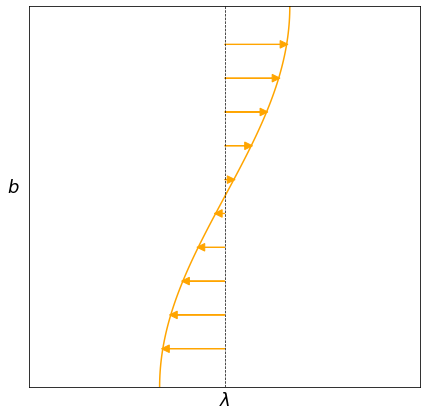

In [97]:
coeff=0.25
y_list=np.linspace(0+ly/10,ly-ly/10,10)
lx,ly=1.5,1
x,y=np.linspace(0,lx,100),np.linspace(0,ly,100)
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(coeff*forcing(y,ly)+lx/2,y,color='orange')
ax.set_xlim(0,lx)
ax.set_ylim(0,ly)
ax.plot(np.ones(2)*lx/2,np.linspace(0,ly,2),'--',linewidth=0.7,color='k')
#ax.plot(np.linspace(0,lx,2),np.ones(2)*ly/2,'--',linewidth=0.9,color='k')
arrow_loop(y_list,coeff,ax)
plt.xticks([],[])
plt.yticks([],[])
ax.set_xlabel(r'$\lambda$',fontsize=18)
ax.set_ylabel(r'$b\ $    ',fontsize=18,rotation=0)
plt.savefig(pathname+'fig/wind_stommel')

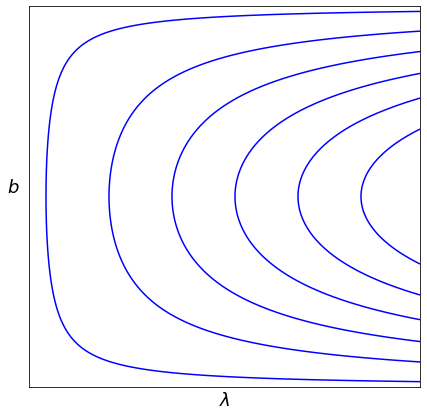

In [123]:
tau0,b,beta=1,1,1
x=np.linspace(0,lx,100)
y=np.linspace(0,ly,100)
X,Y=np.meshgrid(x,y)
fig,ax=plt.subplots(figsize=(7,7))
CS=ax.contour(X,Y,psi_bt(X,Y,tau0,b,beta),np.linspace(0.2,4,6),colors='b')
#plt.clabel(CS)
ax.set_xlim(0,lx)
ax.set_ylim(0,ly)
plt.xticks([],[])
plt.yticks([],[])
ax.set_xlabel(r'$\lambda$',fontsize=18)
ax.set_ylabel(r'$b\ $    ',fontsize=18,rotation=0)
plt.savefig(pathname+ 'fig/sverdrup_solution')